# Ch.06 차원 축소 (Dimension Reduction)

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = load_iris()

## 공분산 행렬

In [6]:
from sklearn.preprocessing import StandardScaler

iris_std = StandardScaler().fit_transform(iris.data)
iris_std[:3,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [7]:
iris_cov = np.dot(iris_std.T, iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [10]:
iris_cov1 = np.dot(iris_std.T, iris_std) / (len(iris_std)-1)
iris_cov1

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [8]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

## 고유값(eigenvector), 고유벡터(eigenvalue) 구하기

In [15]:
eig_vals, eig_vecs = np.linalg.eig(iris_cov)

In [11]:
eig_vals1, eig_vecs1 = np.linalg.eig(iris_cov1)

In [12]:
eig_vals1

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [13]:
eig_vecs1

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [16]:
PC1 = iris_std.dot(np.reshape(eig_vecs.T[0], (4,1)))
PC2 = iris_std.dot(np.reshape(eig_vecs.T[1], (4,1)))

In [18]:
PC1[:3]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905]])

In [19]:
PC2[:3]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802]])

## PCA 변환

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


### PCA(Principal Component Analysis)

In [21]:
columns = ['sepal_length','sepal_width','petal_lengh','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_lengh,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


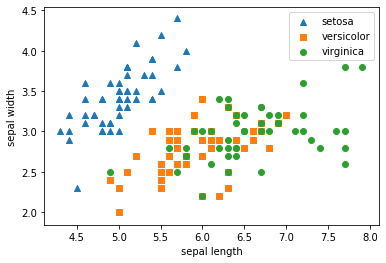

In [23]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [24]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [25]:
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [27]:
pca_colmns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_colmns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


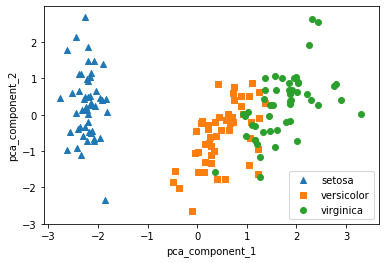

In [28]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [29]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=156)
scores = cross_val_score(rfc, iris.data, iris.target, scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도 : ',scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [33]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rfc, pca_X, iris.target, scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도 : ',scores_pca)
print('원본 데이터 평균 정확도 : ', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
원본 데이터 평균 정확도 :  0.88


## LDA(Linear Discriminant Analysis)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


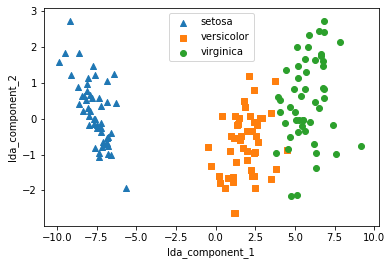

In [36]:
lda_colmns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_colmns)
irisDF_lda['target'] = iris.target

markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_pca['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_pca['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## SVD(Singular Value Decomposition)

In [45]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

In [46]:
# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [47]:
# svd 분해
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3))
print('Vt transpose matrix:\n',np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
Vt transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [48]:
# 원본 행렬 복원
# sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [49]:
# 로우 간 의존성 부여
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [50]:
# 다시 SVD 분해
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [52]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [53]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Trruncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n',matrix_tr)


원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

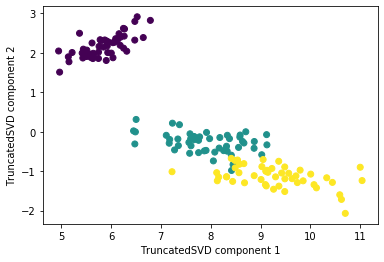

In [55]:
# 사이킷런 TruncatedSVD 클래스를 이용한 변환
from sklearn.decomposition import TruncatedSVD

iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD component 1')
plt.ylabel('TruncatedSVD component 2')
plt.show()

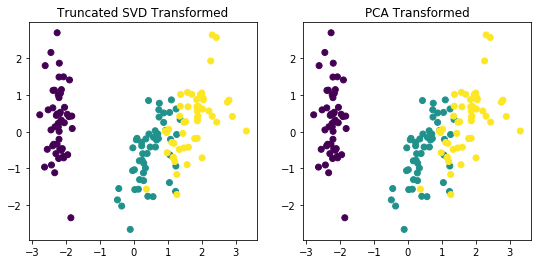

In [57]:
# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncaatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

plt.show()

In [58]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3375977079946134e-15
-6.5052130349130266e-18
